In [9]:
from sklearn.datasets import make_classification

random_seed = 15

X, y = make_classification(n_samples=200, 
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0, 
                           n_classes=3,
                           class_sep=1.5, 
                           n_clusters_per_class=1,
                           random_state=random_seed)

print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary(classifier, X_display, y_display):

    x1, x2 = np.meshgrid(
        np.linspace(-6, 6, 200),
        np.linspace(-6, 6, 200)
    )

    grid = np.vstack([x1.ravel(), x2.ravel()]).T
    y_pred = np.reshape(classifier.predict(grid), x1.shape)

    display = DecisionBoundaryDisplay(
        xx0=x1, xx1=x2, response=y_pred
    )
    
    display.plot()

    plt.scatter(X_display[:, 0], X_display[:, 1], c=y_display, edgecolor="black")

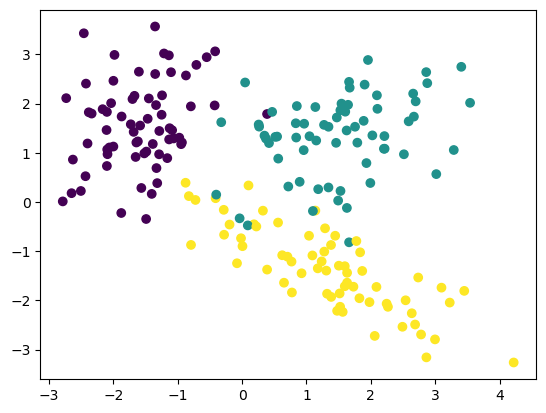

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 2)
(150,)
(50, 2)
(50,)


In [13]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(
                                    solver='sag',
                                    multi_class='ovr',
                                    random_state=random_seed).fit(X_train, y_train)

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'l2'} or None. Got 'None' instead.

In [31]:
preds = logistic_model.predict(X_test)
preds

array([1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 1])

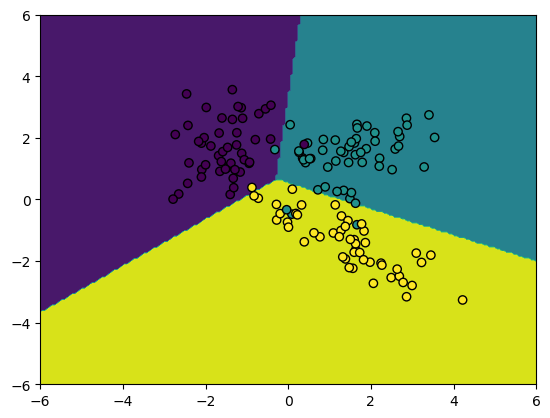

In [32]:
plot_decision_boundary(logistic_model, X_train, y_train)

In [33]:
logistic_model.score(X_train, y_train)

0.96

In [34]:
logistic_model.score(X_test, y_test)

0.94